## 1. Install and Import

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## 2. Reading, Writing and Displaying Images

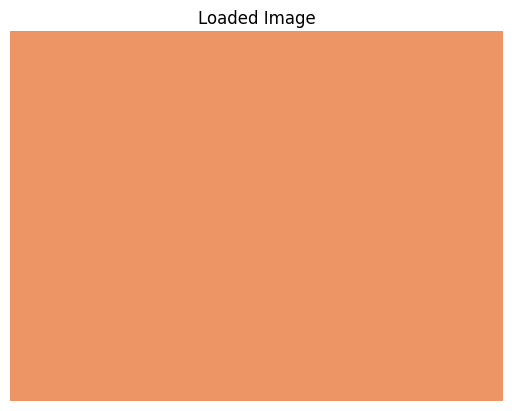

In [3]:
img = np.zeros((300, 400, 3), dtype=np.uint8)
img[:] = (100, 149, 237)

cv2.imwrite("downlabs.png", img)

loaded = cv2.imread("downlabs.png")
rgb = cv2.cvtColor(loaded, cv2.COLOR_BGR2RGB)

plt.imshow(rgb)
plt.axis("off")
plt.title("Loaded Image")
plt.show()

## 3. Resizing and Cropping

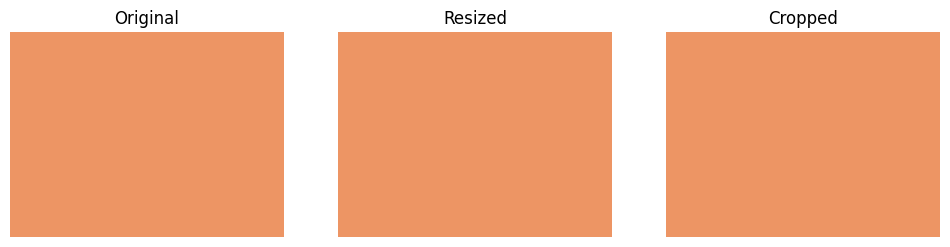

In [4]:
base = cv2.imread("downlabs.png")

resized = cv2.resize(base, (200, 150))
cropped = base[50:200, 100:300]

fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for ax, im, t in zip(axes, [base, resized, cropped], ["Original", "Resized", "Cropped"]):
    ax.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
    ax.set_title(t)
    ax.axis("off")
plt.show()

## 4. Color Space Conversion

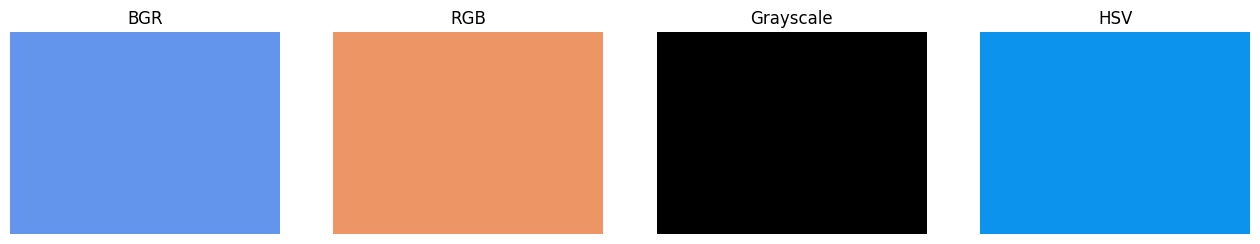

In [5]:
img_bgr = cv2.imread("downlabs.png")

img_rgb  = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
img_hsv  = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)

fig, axes = plt.subplots(1, 4, figsize=(16, 4))
pairs = [(img_bgr, "BGR"), (img_rgb, "RGB"), (img_gray, "Grayscale"), (img_hsv, "HSV")]
for ax, (im, t) in zip(axes, pairs):
    if len(im.shape) == 2:
        ax.imshow(im, cmap="gray")
    else:
        ax.imshow(im)
    ax.set_title(t)
    ax.axis("off")
plt.show()

## 5. Drawing Shapes and Text

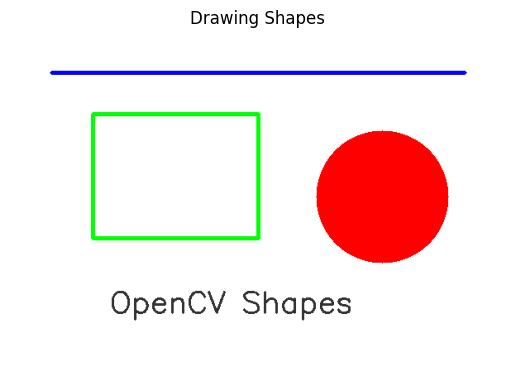

In [6]:
canvas = np.ones((400, 600, 3), dtype=np.uint8) * 255

cv2.line(canvas, (50, 50), (550, 50), (255, 0, 0), 3)
cv2.rectangle(canvas, (100, 100), (300, 250), (0, 255, 0), 4)
cv2.circle(canvas, (450, 200), 80, (0, 0, 255), -1)
cv2.putText(canvas, "OpenCV Shapes", (120, 340), cv2.FONT_HERSHEY_SIMPLEX, 1.2, (50, 50, 50), 2)

plt.imshow(cv2.cvtColor(canvas, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Drawing Shapes")
plt.show()

## 6. Image Thresholding

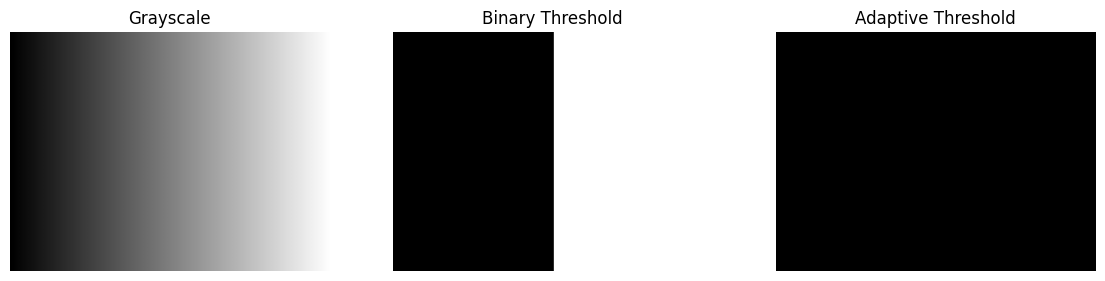

In [7]:
gray_img = np.tile(np.linspace(0, 255, 400, dtype=np.uint8), (300, 1))

_, thresh_bin  = cv2.threshold(gray_img, 127, 255, cv2.THRESH_BINARY)
thresh_adapt   = cv2.adaptiveThreshold(gray_img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                        cv2.THRESH_BINARY, 11, 2)

fig, axes = plt.subplots(1, 3, figsize=(14, 4))
for ax, im, t in zip(axes,
                     [gray_img, thresh_bin, thresh_adapt],
                     ["Grayscale", "Binary Threshold", "Adaptive Threshold"]):
    ax.imshow(im, cmap="gray")
    ax.set_title(t)
    ax.axis("off")
plt.show()

## 7. Edge Detection with Canny

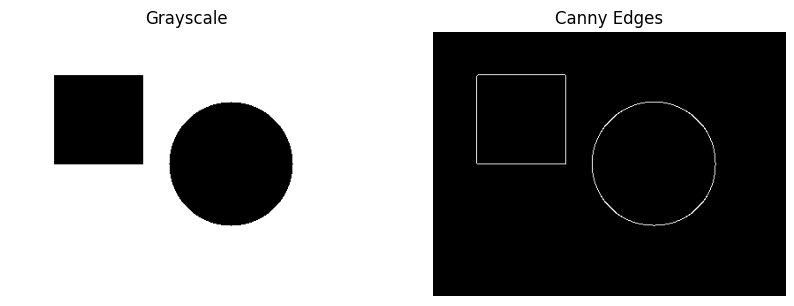

In [8]:
shapes = np.ones((300, 400, 3), dtype=np.uint8) * 255
cv2.rectangle(shapes, (50, 50), (150, 150), (0, 0, 0), -1)
cv2.circle(shapes, (250, 150), 70, (0, 0, 0), -1)

gray_shapes = cv2.cvtColor(shapes, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray_shapes, 50, 150)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].imshow(gray_shapes, cmap="gray")
axes[0].set_title("Grayscale")
axes[0].axis("off")
axes[1].imshow(edges, cmap="gray")
axes[1].set_title("Canny Edges")
axes[1].axis("off")
plt.show()

## 8. Contours and Shape Detection

Contours found: 3


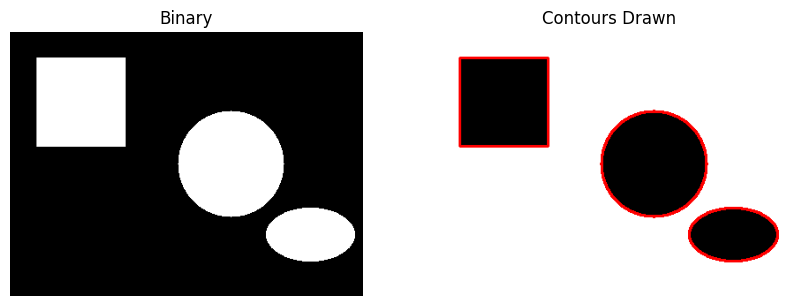

In [9]:
img_contour = np.ones((300, 400, 3), dtype=np.uint8) * 255
cv2.rectangle(img_contour, (30, 30), (130, 130), (0, 0, 0), -1)
cv2.circle(img_contour, (250, 150), 60, (0, 0, 0), -1)
cv2.ellipse(img_contour, (340, 230), (50, 30), 0, 0, 360, (0, 0, 0), -1)

gray_c = cv2.cvtColor(img_contour, cv2.COLOR_BGR2GRAY)
_, binary = cv2.threshold(gray_c, 127, 255, cv2.THRESH_BINARY_INV)

contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
output = img_contour.copy()
cv2.drawContours(output, contours, -1, (0, 0, 255), 2)

print(f"Contours found: {len(contours)}")

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].imshow(binary, cmap="gray")
axes[0].set_title("Binary")
axes[0].axis("off")
axes[1].imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
axes[1].set_title("Contours Drawn")
axes[1].axis("off")
plt.show()

## 9. Face Detection with CascadeClassifier

Faces detected: 1


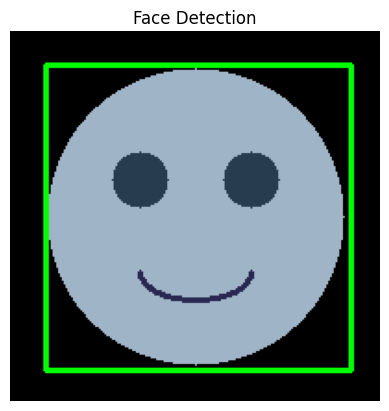

In [10]:
import urllib.request
import os

url = "https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml"
xml_path = "haarcascade_frontalface_default.xml"

if not os.path.exists(xml_path):
    urllib.request.urlretrieve(url, xml_path)

face_cascade = cv2.CascadeClassifier(xml_path)

face_img = np.zeros((200, 200, 3), dtype=np.uint8)
cv2.circle(face_img, (100, 100), 80, (200, 180, 160), -1)
cv2.circle(face_img, (70, 80), 15, (80, 60, 40), -1)
cv2.circle(face_img, (130, 80), 15, (80, 60, 40), -1)
cv2.ellipse(face_img, (100, 130), (30, 15), 0, 0, 180, (80, 40, 40), 2)

gray_face = cv2.cvtColor(face_img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray_face, scaleFactor=1.1, minNeighbors=3, minSize=(20, 20))

result = face_img.copy()
for (x, y, w, h) in faces:
    cv2.rectangle(result, (x, y), (x+w, y+h), (0, 255, 0), 2)

print(f"Faces detected: {len(faces)}")

plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Face Detection")
plt.show()